In [1]:
# Importing necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# getting necessary csv file
df_wine = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/winedataset.csv')

In [3]:
# let's take a look at the data
df_wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# now let's see data types and if there are any missing values
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  diluted wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
# A statistic summary of the data
df_wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# let's look at correlation of our target variable with the rest of the columns
df_wine.corr()['Class']

Class                   1.000000
Alcohol                -0.328222
Malic acid              0.437776
Ash                    -0.049643
Alcalinity of ash       0.517859
Magnesium              -0.209179
Total phenols          -0.719163
Flavanoids             -0.847498
Nonflavanoid phenols    0.489109
Proanthocyanins        -0.499130
Color intensity         0.265668
Hue                    -0.617369
diluted wines          -0.788230
Proline                -0.633717
Name: Class, dtype: float64

Looks like 'Ash' column has insignificant correlation comparitively, so it's possible to drop it when we train our model

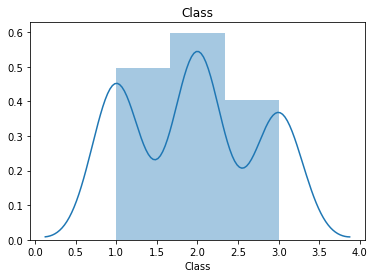

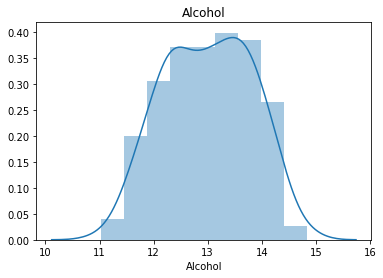

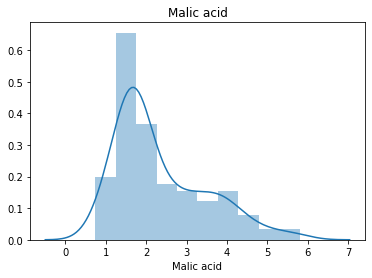

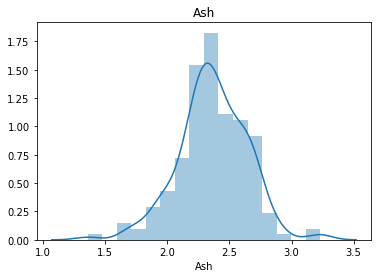

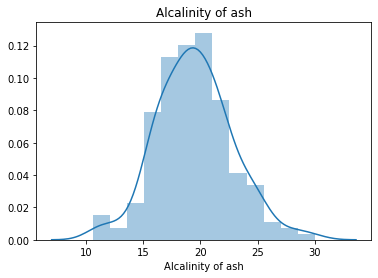

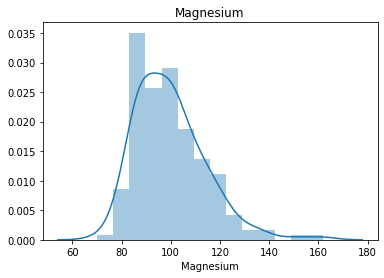

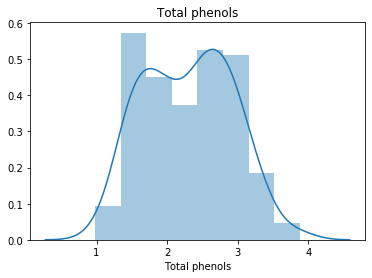

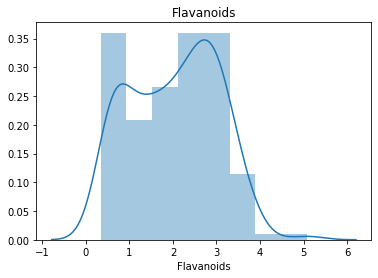

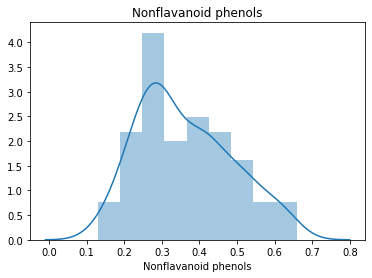

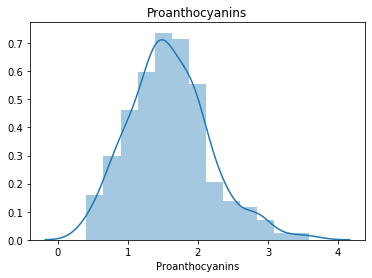

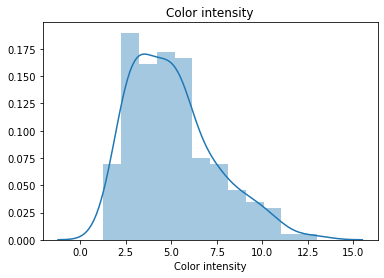

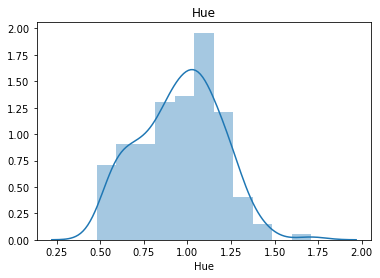

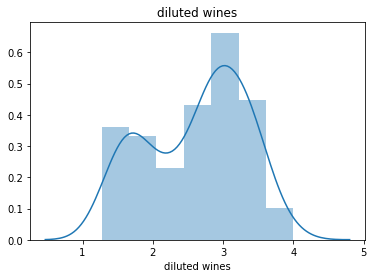

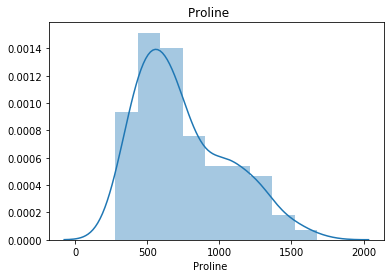

In [7]:
for i in df_wine.columns:
    sns.distplot(df_wine[i])
    plt.title(i)
    plt.show()

There are a number of variables that are skewed, lets look at the skewness now

In [8]:
df_wine.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

Malic acid, Magnesium, Color intensity and Proline are skewed more than whats acceptable, so we'll have to remove skewness transforming the data

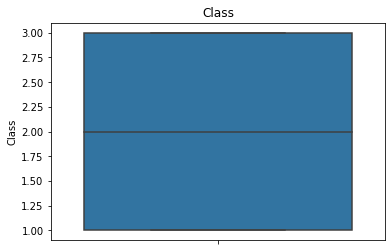

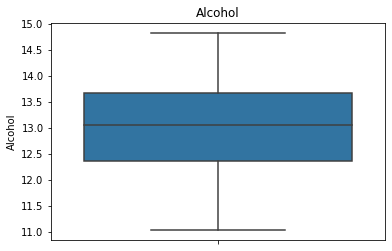

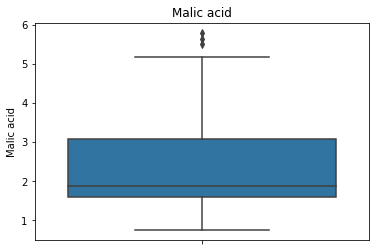

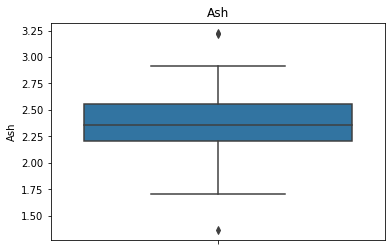

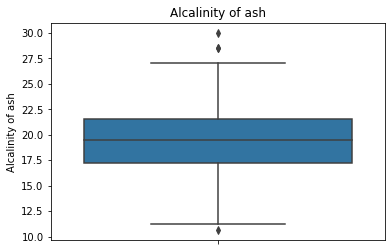

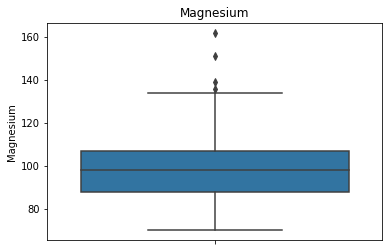

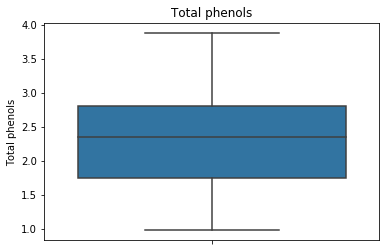

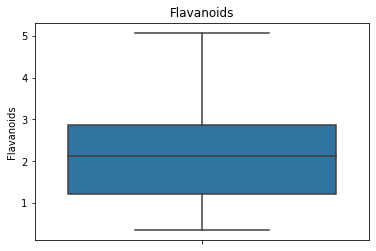

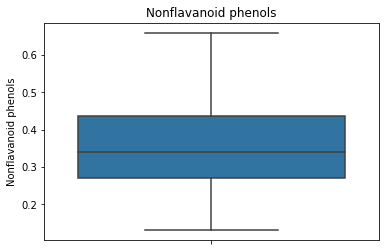

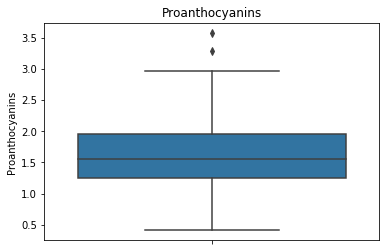

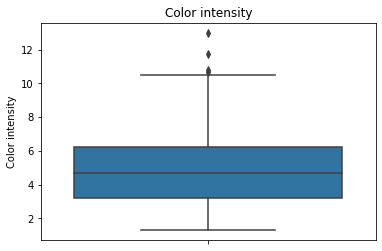

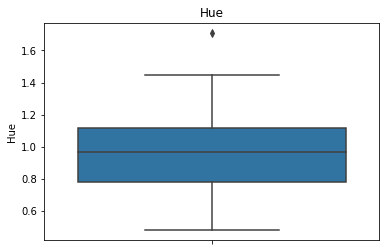

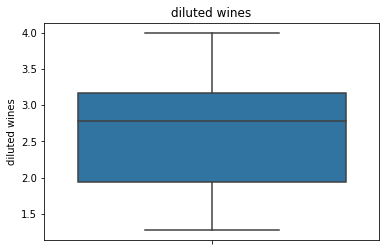

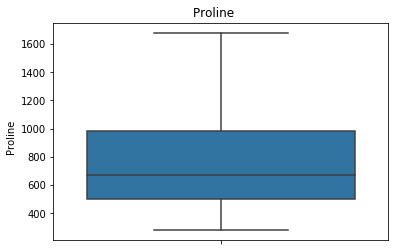

In [9]:
# Checking for outliers
for i in df_wine.columns:
    sns.boxplot(df_wine[i],orient = 'v')
    plt.title(i)
    plt.show()

Looks like there are a few outliers in the data, let's remove them by getting their z score values

In [10]:
# computing z score values
from scipy.stats import zscore
z = np.abs(zscore(df_wine))

In [11]:
df_new = df_wine[(z<3).all(axis=1)]

In [12]:
df_new

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [13]:
# percentage of data removed
(10/178)*100

5.617977528089887

Its just above 5 percent which is barely acceptable

In [14]:
x = df_new.drop('Class', axis=1)
y = df_new['Class']

In [15]:
# Removing skewness
from sklearn.preprocessing import power_transform
x = power_transform(x,method = 'yeo-johnson')

/Users/sriramsureshkumar/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [16]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [19]:
# Let's use Random Forest and SVC for our models
model1 = RandomForestClassifier()
model2 = SVC()

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
# Finding the best parameters for our models using GridSearchCV
paramgrid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),paramgrid)

In [22]:
grid.fit(x_train,y_train)
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [23]:
grid_pred = grid.predict(x_test)

In [24]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [25]:
r2 = r2_score(y_test,grid_pred)
c_val = cross_val_score(SVC(C=1,gamma=0.1),x_train,y_train,cv=5).mean()
print('The SVC model has obtained a r2 score of',r2*100,'cross val score of',c_val)

The SVC model has obtained a r2 score of 94.2242355605889 cross val score of 0.9826086956521738


In [26]:
# Now using Random Forest, let's first find best random state for the split
r_state = 0
r2 = 0

for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = i)
    r_forest = RandomForestClassifier()
    r_forest.fit(x_train,y_train)
    pred = r_forest.predict(x_test)
    t_acc = r2_score(y_test,pred)
    if t_acc > r2:
        r2 = t_acc
        r_state = i

print('Best r2 score found in random state', r_state)

Best r2 score found in random state 1


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 3)
RF_class = RandomForestClassifier()
RF_class.fit(x_train, y_train)
r_pred = RF_class.predict(x_test)
r2_RF = r2_score(y_test, r_pred)
c_val_RF = cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5).mean()
print('The Random forest classifier model has obtained a r2 score of',r2_RF*100,'cross val score of',c_val_RF)

The Random forest classifier model has obtained a r2 score of 100.0 cross val score of 0.9742753623188406
